In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.score_vars import ScoreVariables
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [4]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [28]:
def func(run1):
    comb = CombinationSearch()
    comb.set_selection_criteria('sharpe')
    comb.params['training_epochs'] = 5
    comb.add_run(run1)
    comb.start()
    
    selection = ScoreVariables()
    selection.set_selection_criteria('sharpe')
    selection.add_run(run1)
    selection.start()
    
    plt.figure()
    plt.plot(selection.best_results_returns.iloc[:,0].cumsum())
    plt.plot(comb.best_results_returns.iloc[:,0].cumsum())
    plt.show()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 5/5 [00:06<00:00,  1.40s/it]


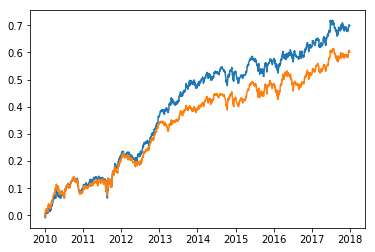

In [29]:
func(RunManager('StatArbStrategy', 'run_0100'))

# New Runs

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 5/5 [00:01<00:00,  3.41it/s]


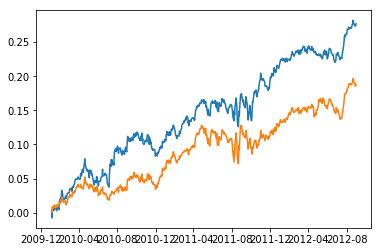

In [90]:
func(RunManager('StatArbStrategy', 'run_0119', test_periods=0))

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 5/5 [00:01<00:00,  4.01it/s]


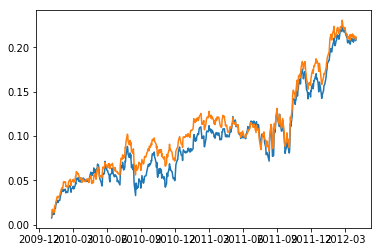

In [91]:
func(RunManager('StatArbStrategy', 'run_0120', test_periods=0))

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 5/5 [00:01<00:00,  2.72it/s]


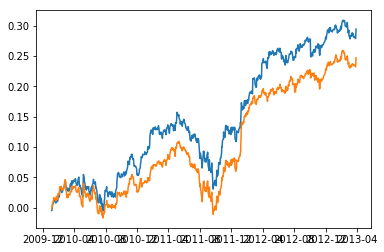

In [92]:
func(RunManager('StatArbStrategy', 'run_0121', test_periods=0))

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


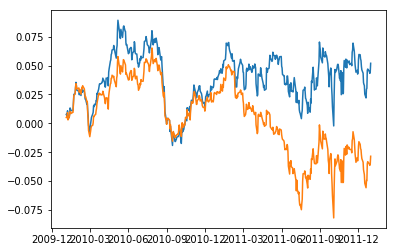

In [93]:
func(RunManager('StatArbStrategy', 'run_0122', test_periods=0))

# Non-ranked sector 45/25

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


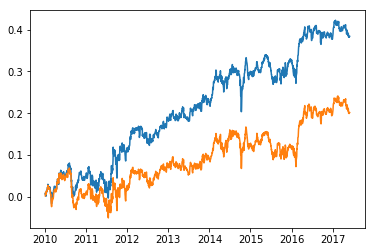

In [34]:
func(RunManager('StatArbStrategy', 'run_0107', test_periods=0))

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


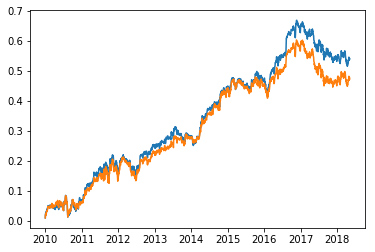

In [35]:
func(RunManager('StatArbStrategy', 'run_0108', test_periods=0))

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


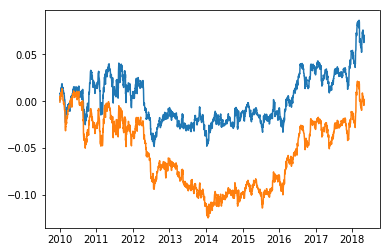

In [36]:
func(RunManager('StatArbStrategy', 'run_0106', test_periods=0))